# Glyphs dataset: support vector machine
The following exercise is taken from <b> Machine Learning with R</b> by <b> Brett Lantz </b> (Third Edition)

The dataset used in the exercise is the <b>printed glyphs</b> dataset. The dataset was orginainally published in a study by <b>Frey and Slate</b> in 1991. The dataset here is downloaded from the textbook's github page. The dataset is also freely available at <b>UCI Machine Learning Repository</b>.

## Step 1: Collecting data

In [1]:
letters <- read.csv("https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-with-R-Third-Edition/master/Chapter07/letterdata.csv")

## Step 2: Exploring and preparing the data

In [2]:
str(letters)

'data.frame':	20000 obs. of  17 variables:
 $ letter: Factor w/ 26 levels "A","B","C","D",..: 20 9 4 14 7 19 2 1 10 13 ...
 $ xbox  : int  2 5 4 7 2 4 4 1 2 11 ...
 $ ybox  : int  8 12 11 11 1 11 2 1 2 15 ...
 $ width : int  3 3 6 6 3 5 5 3 4 13 ...
 $ height: int  5 7 8 6 1 8 4 2 4 9 ...
 $ onpix : int  1 2 6 3 1 3 4 1 2 7 ...
 $ xbar  : int  8 10 10 5 8 8 8 8 10 13 ...
 $ ybar  : int  13 5 6 9 6 8 7 2 6 2 ...
 $ x2bar : int  0 5 2 4 6 6 6 2 2 6 ...
 $ y2bar : int  6 4 6 6 6 9 6 2 6 2 ...
 $ xybar : int  6 13 10 4 6 5 7 8 12 12 ...
 $ x2ybar: int  10 3 3 4 5 6 6 2 4 1 ...
 $ xy2bar: int  8 9 7 10 9 6 6 8 8 9 ...
 $ xedge : int  0 2 3 6 1 0 2 1 1 8 ...
 $ xedgey: int  8 8 7 10 7 8 8 6 6 1 ...
 $ yedge : int  0 4 3 2 5 9 7 2 1 1 ...
 $ yedgex: int  8 10 9 8 10 7 10 7 7 8 ...


- 16 statistical attributes were recorded, measuring characteristics such as
    - horizontal and vertical dimensions of the glyph
    - proportion of black vs white pixels
    - average horizontal and vertical position of the pixels
- presumably, the concentration of black pixels across the certain areas should provide a way to differentiate the letters
- there is no need to convert factors to numeric features (required for SVM) all features are already numeric
- while scaling is required, the kernlab package automatically takes care of normalization

In [3]:
letters_train <- letters[1:16000,]
letters_test <- letters[16000:20000,]

In [10]:
library(kernlab)
letter_classifier <- ksvm(letter ~ ., data = letters_train, kernel = "vanilladot")
letter_classifier

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 7037 

Objective Function Value : -14.1746 -20.0072 -23.5628 -6.2009 -7.5524 -32.7694 -49.9786 -18.1824 -62.1111 -32.7284 -16.2209 -32.2837 -28.9777 -51.2195 -13.276 -35.6217 -30.8612 -16.5256 -14.6811 -32.7475 -30.3219 -7.7956 -11.8138 -32.3463 -13.1262 -9.2692 -153.1654 -52.9678 -76.7744 -119.2067 -165.4437 -54.6237 -41.9809 -67.2688 -25.1959 -27.6371 -26.4102 -35.5583 -41.2597 -122.164 -187.9178 -222.0856 -21.4765 -10.3752 -56.3684 -12.2277 -49.4899 -9.3372 -19.2092 -11.1776 -100.2186 -29.1397 -238.0516 -77.1985 -8.3339 -4.5308 -139.8534 -80.8854 -20.3642 -13.0245 -82.5151 -14.5032 -26.7509 -18.5713 -23.9511 -27.3034 -53.2731 -11.4773 -5.12 -13.9504 -4.4982 -3.5755 -8.4914 -40.9716 -49.8182 -190.0269 -43.8594 -44.8667 -45.2596 -13.5561 -17.7664 -87.4105 -107.1056 -37.0245 -30.7133 -112.3218 -32.9619 -27.2971 -35.5

## Step 4: Evaluating model performance

In [11]:
letter_predictions <- predict(letters_classifier, letters_test)
head(letter_predictions)
table(letter_predictions, letters_test$letter)

[1] C U N V X N
Levels: A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

                  
letter_predictions   A   B   C   D   E   F   G   H   I   J   K   L   M   N   O
                 A 144   0   0   0   0   0   0   0   0   1   0   0   1   2   2
                 B   0 121   0   5   2   0   1   2   0   0   1   0   1   0   0
                 C   0   0 121   0   4   0  10   2   2   0   1   3   0   0   2
                 D   2   2   0 156   0   1   3  10   4   3   4   3   0   5   5
                 E   0   0   5   0 127   3   1   1   0   0   3   4   0   0   0
                 F   0   0   0   0   0 138   2   2   6   0   0   0   0   0   0
                 G   1   1   2   1   9   2 123   2   0   0   1   2   1   0   1
                 H   0   0   0   1   0   1   0 102   0   2   3   2   3   4  20
                 I   0   1   0   0   0   1   0   0 141   8   0   0   0   0   0
                 J   0   1   0   0   0   1   0   2   5 128   0   0   0   0   1
                 K   1   1   9   0   0   0   2   5   0   0 118   0   0   2   0
                 L   0   0   0   

In [12]:
agreement <- letter_predictions == letters_test$letter
table(agreement)

agreement
FALSE  TRUE 
  643  3358 

In [13]:
prop.table(table(agreement))

agreement
    FALSE      TRUE 
0.1607098 0.8392902 

## Step 5: Improving model performance

### Changing the SVM kernel function

In [14]:
letters_classifier_rbf <- ksvm(letter ~ ., data = letters_train, kernel = "rbfdot")
letter_predictions_rbf <- predict(letters_classifier_rbf, letters_test)
agreement_rbf <- letter_predictions_rbf == letters_test$letter

table(agreement_rbf)
prop.table(table(agreement_rbf))

agreement_rbf
FALSE  TRUE 
  277  3724 

agreement_rbf
     FALSE       TRUE 
0.06923269 0.93076731 

### Identifying the best SVM cost parameter

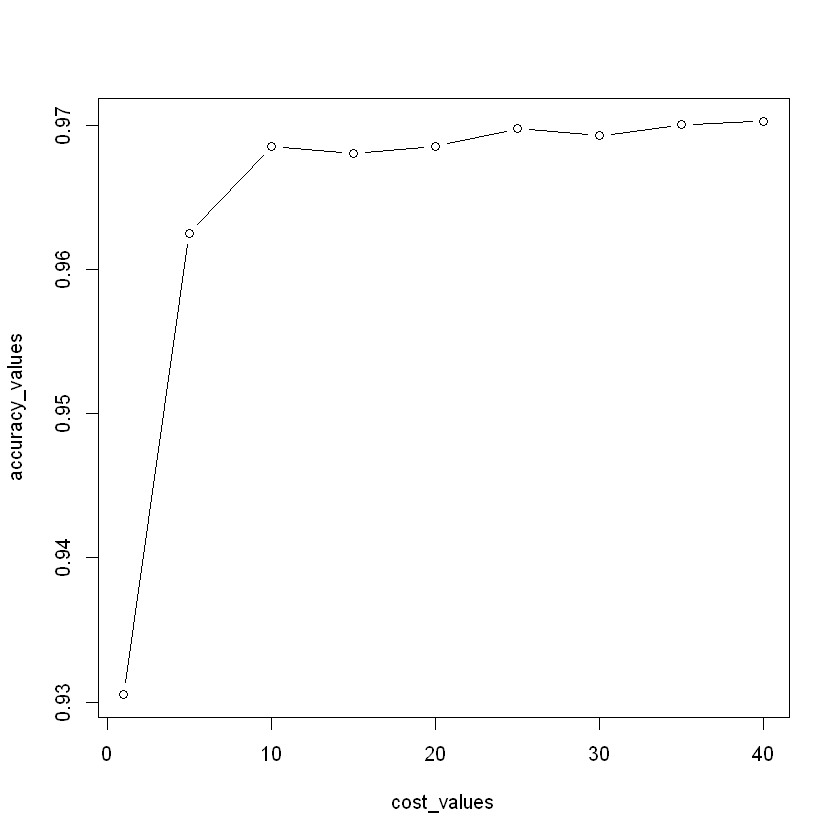

In [15]:
# Plotting the cost function 

cost_values <- c(1, seq(5, 40, 5))

accuracy_values <- sapply(cost_values, function(x){
    set.seed(12345)
    m <- ksvm(letter ~ ., data = letters_train, kernel = "rbfdot",
             C = x)
    pred <- predict(m, letters_test)
    agree <- ifelse(pred == letters_test$letter, 1, 0)
    accuracy <- sum(agree) / nrow(letters_test)
    return (accuracy)
})

plot(cost_values, accuracy_values, type = "b")

- a C = 1 value clearly performs the worst
- C = 10 appears to be the most promising cost value, with roughly 97% accuracy